<a href="https://colab.research.google.com/github/Thomas-Guibert/AI-TP3/blob/main/AI_TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Machine Learning avec Scikit Learn



## Exercice 1: Échauffement avec le dataset Hearthstone


### A - Les données


L'objectif de cette premiere partie est de prendre en main le traitement des données ainsi que la prise en main de colab.
Pour ce faire nous allons utiliser des dataset de partie de Heartstone bien plus complete que celle utiliser pour le TP précédent.

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


C'est premiere ligne servent uniquement a colab pour aller chercher les ressource presnte dans le drive.

In [31]:
import pandas as pd  # charge le module pandas et le renomme pd
data = pd.read_csv("/content/drive/MyDrive/Université/M1/S8/IA/TP3/full_dataset.csv")

#Affichage des attribut
print(data.columns)
print("")
#Resumer des donnée
print(data)

print("")
help(len)

Index(['game_id', 'me_playing', 'my_board_nb_creatures',
       'my_board_total_attack', 'my_board_total_health', 'my_class', 'my_hand',
       'my_health', 'opponent_board_nb_creatures',
       'opponent_board_total_attack', 'opponent_board_total_health',
       'opponent_class', 'opponent_hand', 'opponent_health', 'result',
       'turn_id', 'turns_to_end'],
      dtype='object')

       game_id  me_playing  ...  turn_id  turns_to_end
0          434       False  ...        1            10
1          434        True  ...        2             9
2          434       False  ...        3             8
3          434        True  ...        4             7
4          434       False  ...        5             6
...        ...         ...  ...      ...           ...
36143      728       False  ...       17             4
36144      728        True  ...       18             3
36145      728       False  ...       19             2
36146      728        True  ...       20             1
36147    

L'objet data permet d'avoir accès a l'objet full_dataset.csv qui contient nos donnée. Grace a lui nous ponvons accéder facilement au donnée et attribut qu'elle contient.
Nous allons voir plusieurs façon de recolter ces attribut.

premierement pour avoir la liste des attribut de data il suffit de faire data.columns, a ou un simpl data suffit pour recupere un resumer des données (Pour chaque ligne récupérer les valeur de tout les attribut, soit 36148 ligne pour 17 columns).

On peut noté la presence de la commande spécial help qui permet d'avoir la documentation de la fonction donnée, dans notre exemple il s'agit de la fonction len.

In [32]:
print("taille des donnée, nombre de ligne")
print(len(data))
print("")
print("")
print("taille des donnée, nombre de ligne")
print("premier attribut des données")
print("    "+data.columns[0])
print("troisième attribut des données")
print("    "+data.columns[2])
print("derniere attribut des données")
print("    "+data.columns[-1]) 
print("")
print("")
print("Nombre de ligne et nombre de colone")
print(data.shape) 
print("")
print("")
print("Recuperation de la valeur de tout les attribut du premier element")
print(data.iloc[0])
print("")
print("")
print("Recuperation de la valeur de tout les attributs des 5 premiere ligne")
print(data[0:5])
print("")
print("Recuperation de la valeur de tout les attributs des 5 derniere ligne")
print(data[-5:-1])
print("")
print("Recuperation de la valeur de tout les attributs qui sont des multiple de trois et inferieur a 10")
print(data[0:10:3])

print("")
print("")
print("Affiche l'attribut de la santé de toutes les lignes")
print(data["my_health"])
print("")
print("")
print("Affiche les attribut my_health et my_hand des ligne 0 a 5")
print(data[["my_health","my_hand"]][0:5])

taille des donnée, nombre de ligne
36148


taille des donnée, nombre de ligne
premier attribut des données
    game_id
troisième attribut des données
    my_board_nb_creatures
derniere attribut des données
    turns_to_end


Nombre de ligne et nombre de colone
(36148, 17)


Recuperation de la valeur de tout les attribut du premier element
game_id                            434
me_playing                       False
my_board_nb_creatures                0
my_board_total_attack                0
my_board_total_health                0
my_class                          Mage
my_hand                              5
my_health                           30
opponent_board_nb_creatures          2
opponent_board_total_attack          6
opponent_board_total_health          3
opponent_class                 Warlock
opponent_hand                        3
opponent_health                     27
result                               0
turn_id                              1
turns_to_end                       

Comme le dit la commande help len sert a obtenir la taille des donnée, c'est a dire le nombres de ligne soit 36148.

Pour avoir l'attribut corespondant a une colone, on peut faire data.columns[nb de la colone].
On peut aussi recupere le nombre de columne et de ligne avec data.shape

Avec data.iloc[nb] on peut recupere la valeur de tout les attributs de la ligne donnée.

Grace a data[0:5] on peut faire comme iloc mais ici on recupere tout les attribut des ligne compris dans l'interval donnée. Les nombre négatif permet d'aler recupere les derniere lignes.
Il existe la variante data[0:10:3] qui fait exactement la meme chose mais cette fois elle prendre les ligne mulitple du troisième nombre rentrer dans l'intervalle former avec les deux premiers chiffre rentrer.

Les derniere commande permetais de recupere des lignes, avec data[attribut] on recupèr l'entièreter des valeur que l'attribut a pour chaqu'un des lignes.

On peut aussi combiner plusieurs commande et avoir ce genre de chose : (data[["my_health","my_hand"]][0:5]) :
Cela permet de recupere la valeu des deux attribut renseigner pour les ligne de l'intervale donnée.


In [33]:
turns_before_end = 4   # 4 tours avant la fin

print("nombre de ligne ou est egal a 4")
turn_df = data[data["turns_to_end"]==turns_before_end]
print(len(turn_df))

nombre de ligne ou est egal a 4
2049


Dans notre étude nous allons analyser les partie ou il ne reste que 4 tours a joué avant la fin de la partie. Il nous faut donc faire un tri sur les données, la ligne suivant : data[data["turns_to_end"]==turns_before_end] , permet de recupere les ligne pour lesquels l'attribut "turns_before_end" est égale à 4.

En combinant cela avec len on recupere le nombre de ligne ou il ne reste que 4 tour avant la fin de la partie.

In [34]:
features_cols = ["my_health", "opponent_health", "my_hand", "opponent_hand", "my_board_nb_creatures",
     "my_board_total_health", "my_board_total_attack", "opponent_board_nb_creatures",
     "opponent_board_total_health", "opponent_board_total_attack", "me_playing"]
 
pred_col = "result"
 
X = turn_df[features_cols]
Y = turn_df[pred_col]
#Description des ligne ou il n'y a plus que 4 tour avant la fin
print(X)
#Affichage d'uniquement le resultat pour chacune
print(Y)

       my_health  opponent_health  ...  opponent_board_total_attack  me_playing
6             23               27  ...                         11.0       False
13            27               30  ...                          6.0        True
28             8               28  ...                         13.0       False
45            24                9  ...                          4.0        True
65            18               20  ...                         17.0       False
...          ...              ...  ...                          ...         ...
36086         22               23  ...                          0.0       False
36096         26               28  ...                          5.0        True
36108         23               15  ...                          3.0       False
36122         30               30  ...                          6.0        True
36143         14               23  ...                          6.0       False

[2049 rows x 11 columns]
6        0
13 

Les ligne au dessus permet d'afficher le contenu des ligne ou il ne reste que 4 tour avant la fin de la partie. 
avec turn_df["result"] on affiche le resultat de victoire ou non de la partie.

### B - Affichage

Pour afficher les donnée de maniere a bien les visualiser, nous utiliserons matplotlib.pyplot.

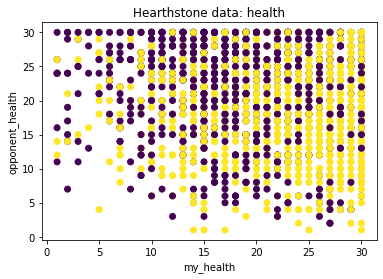

In [35]:
from matplotlib import pyplot as plt # alias the name "pyplot" by "plt" 
 
x_col="my_health"
y_col="opponent_health"
 
plt.xlabel(x_col) # all the functions defined in a given library should be prefixed by the name of the library
plt.ylabel(y_col)
plt.title("Hearthstone data: health")

plt.scatter(X[x_col], X[y_col],c=Y)
plt.show() 

Ici on peut visualiser le nombre de vie de chaqu'un des joueur au moment ou il n'y a plus que 4 tour a jouer, et on voit si la partie a ete gagner ou pas.

6         True
13        True
28        True
45       False
65        True
         ...  
36086    False
36096    False
36108    False
36122    False
36143     True
Name: result, Length: 2049, dtype: bool
       my_health  opponent_health  ...  opponent_board_total_attack  me_playing
6             23               27  ...                         11.0       False
13            27               30  ...                          6.0        True
28             8               28  ...                         13.0       False
65            18               20  ...                         17.0       False
79            26               26  ...                          7.0        True
...          ...              ...  ...                          ...         ...
35913         28               18  ...                         13.0       False
35932         13               30  ...                         11.0       False
35962         13               14  ...                          0.0        

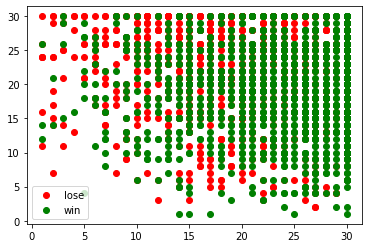

In [36]:
#Remplace les 0 et 1 des resultat par True et False
print(Y==0)
#fait la meme chose mais en affichant tout les autre attribut
print(X[Y==0])

plt.scatter(X[Y==0][x_col], X[Y==0][y_col], color="red",label="lose")
plt.scatter(X[Y==1][x_col], X[Y==1][y_col], color="green",label="win") 

plt.legend()
plt.show()

Grace a Y==0 on peut remplacer les 0 et les 1 de resultat par un boolean
En appliquans cela a X on remplace les nombres de la colomns Resultat par des boolean en gardant toutes les autre colomnes intacte

En passant a des boolean,nous pouvons indiquer la couleur et le label associer au element respectant la condition donnée qui est que le resultat soit faux pour rouge et vrai pour vert.
Une fois les regle de traitement de donnée mis en place, il suffit d'affiche la legend et le diagramme avec les deux derniere ligne du code ci-dessus pour avoir les resultat avec un code couleur plus parlant

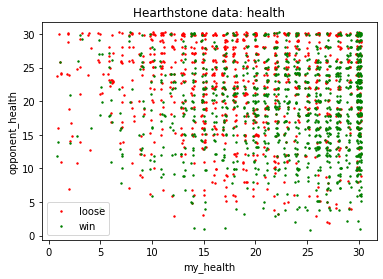

In [37]:
# TP3prog1.py
 
import pandas as pd
from matplotlib import pyplot as plt
from numpy.random import random
 
data = pd.read_csv("/content/drive/MyDrive/Université/M1/S8/IA/TP3/full_dataset.csv")
 
features_cols = ["my_health", "opponent_health", "my_hand", "opponent_hand", "my_board_nb_creatures",
     "my_board_total_health", "my_board_total_attack", "opponent_board_nb_creatures",
     "opponent_board_total_health", "opponent_board_total_attack", "me_playing"]
 
pred_col = "result"
 
turns_before_end = 4
 
turn_df = data[data["turns_to_end"] == turns_before_end]
X = turn_df[features_cols]
Y = turn_df[pred_col]
 
x_col="my_health"
y_col="opponent_health"
 
colors=["red", "green"]
labels=["loose", "win"]
for i in range(2):
    indices = Y==i
    nb_rows = sum(indices)
    plt.scatter(X[indices][x_col] + 0.5*(random(nb_rows)-0.5),
                X[indices][y_col] + 0.5*(random(nb_rows)-0.5),
                color=colors[i],label=labels[i],s=2)
plt.legend()
plt.xlabel(x_col) 
plt.ylabel(y_col)
plt.title("Hearthstone data: health") 
plt.show()

Le diagramme ci-dessus est gener par l'execution du code de TP3prog1.py.

À quoi sert le nombre aléatoire ajouté avec random ?

Le nombre random permet de faire des petit décalage pour chaque point car plusieurs point de differente couleur se supperposais dans le diagramme précédant.

Cette visualisation est-elle plus informative que la précédente ?
Cette visualisation est donc bien plus informative car on va plus clairement les différents point et leurs appartenance (victoire ou défaite).

## Exercice 2 : Classification KNN sur Hearthstone


Dans cette partie nous allons utiliser la classificateur des "k plus proche voisin" utilisable abec l'import neighbors.
Cette import donne un certaine nombre de commande permet d'avoir des information precise sur notre classification, tel que classifier des exemple, definir la probabilite de la classification ou encore le score globale du classificateur.

In [38]:
from sklearn import neighbors
nb_neighb = 45

# pour de l’aide taper: help(neighbors.KNeighborsClassifier)
clf = neighbors.KNeighborsClassifier(nb_neighb)

# pour de l’aide taper: help(clf.fit)
clf.fit(X, Y) #on suppose de X et Y sont définis comme dans la partie précédente

# pour de l’aide taper: help(clf.predict) 
print(clf.predict(X[0:5])) 

print(clf.predict_proba(X[0:5])) 
print(clf.score(X,Y)) 

[0 0 0 1 0]
[[0.93333333 0.06666667]
 [0.68888889 0.31111111]
 [0.95555556 0.04444444]
 [0.17777778 0.82222222]
 [0.82222222 0.17777778]]
0.7837969741337237


La premiere ligne "neighbors.KNeighborsClassifier(nb_neighb)" permet de faire une classification des K plus proche voisin, on donne en paramettre le nombre de voisin a prendre en compte.

Avec clf.fit(X, Y), on défini les donnée d'entrainement ainsi que les valeur cible. Ici les donnée d'entrainement sont les donnée de notre partie de Heartstone quand il ne reste que 4 tour avant la fin de la partie. Pour les donnée cible on prend la valeur qui indique si la partie est gagner ou non.

Une fois cela mis en place ou peut utiliser predicte pour avoir un certaine nombre de valeur :

-Avec clf.predict(X[0:5]) on optient l'etiquete majoritaire. Ici pour les resultat l'etiquette "0" qui correspond a perdu est majoritaire pour presque tout les donnée rentrer, seul la 4eme valeur indique que l'on gagne.

-clf.predict_proba(X[0:5]) va plus loin en donnant directement la probabilité, par exemple dans la premiere partie au 4eme tour avant la fin, le joueur adverse avait 93.33% de chance de gagner contre 06.66% pour l'autre. Alors que pour la partie 4 le joueur adverse avait 17.77% de chance de gagner contre 82.22% pour l'autre joueur.

-Enfin clf.score(X,Y) donne la précision moyenne des résultat obtenu a partir des donnée test et des étiquettes données.


Esseyons maintenant avec K = 1 et K = 1000

###- K = 1


In [39]:
nb_neighb = 1

# pour de l’aide taper: help(neighbors.KNeighborsClassifier)
clf = neighbors.KNeighborsClassifier(nb_neighb)

# pour de l’aide taper: help(clf.fit)
clf.fit(X, Y) #on suppose de X et Y sont définis comme dans la partie précédente

# pour de l’aide taper: help(clf.predict) 
print(clf.predict(X[0:5])) 

print(clf.predict_proba(X[0:5])) 
print(clf.score(X,Y)) 

[0 0 0 1 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]
1.0


Sans surprise avec K=1 on ne regarde qu'un seul voisin donc les prediction ne donne que du 0% ou du 100% de chance de gagner. La précision est aussi toucher , elle est de 100% avec cette technique.

###- K=1000

In [60]:
nb_neighb = 1000

# pour de l’aide taper: help(neighbors.KNeighborsClassifier)
clf = neighbors.KNeighborsClassifier(nb_neighb)

# pour de l’aide taper: help(clf.fit)
clf.fit(X, Y) #on suppose de X et Y sont définis comme dans la partie précédente

# pour de l’aide taper: help(clf.predict) 
print(clf.predict(X[0:5])) 

print(clf.predict_proba(X[0:5])) 
print(clf.score(X,Y)) 

[0 1 0 1 0]
[[0.633 0.367]
 [0.461 0.539]
 [0.674 0.326]
 [0.29  0.71 ]
 [0.635 0.365]]
0.7510980966325037


Avec k=1000 on remarque un changement sur la seconde partie, il y a plus de partie perdante pour l'adverser dans les 1000 voisin les plus proche. Les pourcentage passe alors a 46.10% pour l'adverse. On remarque aussi que les pourcentage sont de maniere general plus proche du 50% que avec k=45.
Prendre un tels nombre de voisin fait aussi légerement baisser la précision, ce qui est normal.




On veux maintenant separer le jeux de donnée en deux pour avoir des donnée d'entrenement et des donnée de test indépandante l'une de l'autre. Cependant, il faut un certain nombre de donnée pour les tests car comme nous avons peu le voir pour K=1 précédement, trop peut de donnée ne peut pas donnée des tests convenable.
Le module "model_selection.train_test_split" va nous permetre ici de séparer les donnée.

In [69]:
from sklearn.model_selection import train_test_split 
# pour de l’aide taper: help(train_test_split)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3) 

print(len(X_train))
print(len(X_test))
print(len(X_train[Y_train==0]))
print(len(X_train[Y_train==1]))
print()

nb_neighb = 45
clf = neighbors.KNeighborsClassifier(nb_neighb)
clf.fit(X_train, Y_train)
 
Y_pred = clf.predict(X_test) 
 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

print(cm)

1434
615
629
805

[[210  81]
 [ 55 269]]


Encore une fois nous avons nos donnée X et Y. Grace a "train_test_split(X,Y,test_size=0.3)" on sépare les donnée X et Y en deux, On précise 0.3 pour séparer les données de cette manière : 70% train et 30% test.

-len(X_train) donne la taille des donnée d'entrainement pour X

-len(X_test) donne la taille des donnée des test pour X

-len(X_train[Y_train==0]) donne le nombre de partie perdante dans les donnée d'entrainement de X.

-et enfin len(X_train[Y_train==1]) le nombre de partie gagnante dans les donnée d'entrainement de X.


Par la suite nous faisons exactement la meme chose que précédament, c'est a dire faire une classification mais cette fois sur les donnée d'entrainement X et Y.

A la fin nous utilisons Confusion_matrix sur les donnée de test de Y et les prediction pour Y. cette matrice permet de visualiser l'exactitude de la classification.Plus précisement elle nous montrer :
les VraiPositif = 192
les FauxPositif = 84
les FauxNegatif = 63
et les VraiNegatif = 276
On peut donc voir qui y a quand meme en certaine nombre de Faux possitif et de faux negatif, mais comparer au nombre de vraiPositif et surtout de VraiNegatif cela reste correct.
Ceci etait pour k = 45, maintenant voyons les resultat pour k = 1 et k = 1000


### - K = 1

In [91]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3) 

print(len(X_train))
print(len(X_test))
print(len(X_train[Y_train==0]))
print(len(X_train[Y_train==1]))
print()

nb_neighb1 = 1
clf1 = neighbors.KNeighborsClassifier(nb_neighb1)
clf1.fit(X_train, Y_train)
 
Y_pred1 = clf1.predict(X_test) 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred1)
print(cm)

1434
615
641
793

[[190  89]
 [ 78 258]]


Avec k = 1, On peut voir que la précision est legerement moins bonne. Il y a un peu moins de VraiPositif et de VraiNegatif ainsi que plus de FauxPositif et de FauxNegatif.

### - K = 1000

In [92]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3) 

print(len(X_train))
print(len(X_test))
print(len(X_train[Y_train==0]))
print(len(X_train[Y_train==1]))
print()

nb_neighb2 = 1000
clf2 = neighbors.KNeighborsClassifier(nb_neighb2)
clf2.fit(X_train, Y_train)
 
Y_pred2 = clf2.predict(X_test) 
 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred2)
print(cm)

1434
615
647
787

[[109 164]
 [ 18 324]]


Avec K = 1000 y il y a beaucoup plus de FauxNegatif et de FauxPositif. On peut voir qu'il y a beaucoup plus de VraiPositif que de FauxPositif ce qu'il n'est pas correct.

In [99]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,shuffle=True)
for learn,test in kf.split(X):
        print("app : ",learn," test ",test)

app :  [   0    1    2 ... 2045 2047 2048]  test  [  37   84   97  109  118  120  133  149  156  162  169  182  185  194
  195  196  204  214  227  230  243  251  259  281  284  296  301  306
  312  317  318  320  321  333  336  352  353  354  374  377  382  386
  394  395  446  450  495  507  512  515  519  526  535  546  550  552
  570  577  594  597  600  608  621  633  645  657  662  663  673  682
  690  700  711  713  718  727  736  743  753  778  792  800  821  824
  829  833  845  847  876  879  897  904  908  929  941  955  967  976
  986  995 1000 1004 1007 1012 1014 1017 1034 1060 1079 1092 1101 1122
 1126 1134 1144 1156 1164 1170 1187 1190 1206 1212 1220 1221 1227 1248
 1251 1252 1276 1287 1290 1296 1312 1320 1362 1374 1383 1385 1405 1409
 1415 1420 1421 1432 1450 1466 1482 1492 1533 1557 1560 1566 1571 1585
 1603 1622 1624 1635 1648 1655 1659 1665 1685 1692 1696 1705 1708 1711
 1713 1728 1734 1743 1744 1747 1748 1749 1751 1760 1762 1788 1789 1798
 1825 1838 1861 1864 1871 1

La boucle si dessus permet de donner les indice des element dans l'ensemble d'apprentissage et de test. Ici on crée 10 séparation de donnée differente

In [100]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,shuffle=False)
for learn,test in kf.split(X):
        print("app : ",learn," test ",test)

app :  [ 205  206  207 ... 2046 2047 2048]  test  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204]
app :  [   0    1    2 ... 2046 2047 2048]  test  [205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 22

Mettre Shuffle a False permet de ne pas mélanger les données, Nous avons donc les indices trier par ordre croissant. Dans nos donnée il vaut mieux les mélanger pour avoir plus de diversité entre les ensembles.

best k: 51  score= 0.7828216164514585


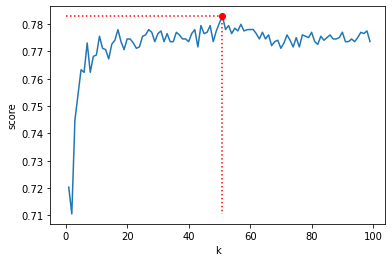

In [103]:
# TP3prog2.py
 
import pandas as pd
from matplotlib import pyplot as plt
 
data = pd.read_csv("/content/drive/MyDrive/Université/M1/S8/IA/TP3/full_dataset.csv")
 
features_cols = ["my_health", "opponent_health", "my_hand", "opponent_hand", "my_board_nb_creatures",
     "my_board_total_health", "my_board_total_attack", "opponent_board_nb_creatures",
     "opponent_board_total_health", "opponent_board_total_attack", "me_playing"]
pred_col = "result"
 
turns_before_end = 4
turn_df = data[data["turns_to_end"] == turns_before_end]
X = turn_df[features_cols]
Y = turn_df[pred_col]
 
from sklearn import neighbors
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,shuffle=True)
scores=[]
k_values = range(1,100,1)
for k in k_values:
    print("Computing... %d %%"%(int(100*(k-k_values[0])/k_values[-1])), end='\r')
    score=0
    clf = neighbors.KNeighborsClassifier(k)
    for learn,test in kf.split(X):
        X_train=X.iloc[learn]
        Y_train=Y.iloc[learn]
        clf.fit(X_train, Y_train)
        X_test=X.iloc[test]
        Y_test=Y.iloc[test]
        score += clf.score(X_test,Y_test) / kf.n_splits
    scores.append(score)

best_score, best_k = max([(v, k_values[i]) for (i,v) in enumerate(scores)])
print("best k:",best_k, " score=",best_score)
plt.plot(k_values, scores)
plt.xlabel("k") 
plt.ylabel("score")
plt.plot(best_k, best_score, 'or')
plt.plot([0,best_k,best_k], [best_score,best_score,min(scores)], ':r')
plt.show()

Le code suivant affiche le graffe des score de précision moyenne des résultat. Le diagramme montre pour quel k le score est le plus élever.
Ici , le score le plus elever est généralement contenu dans 40-50 k.

best k: 201  score= 0.7774605451936871


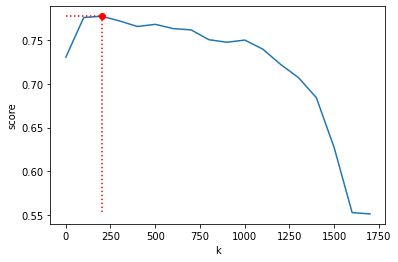

In [109]:
import pandas as pd
from matplotlib import pyplot as plt
 
data = pd.read_csv("/content/drive/MyDrive/Université/M1/S8/IA/TP3/full_dataset.csv")
 
features_cols = ["my_health", "opponent_health", "my_hand", "opponent_hand", "my_board_nb_creatures",
     "my_board_total_health", "my_board_total_attack", "opponent_board_nb_creatures",
     "opponent_board_total_health", "opponent_board_total_attack", "me_playing"]
pred_col = "result"
 
turns_before_end = 4
turn_df = data[data["turns_to_end"] == turns_before_end]
X = turn_df[features_cols]
Y = turn_df[pred_col]
 
from sklearn import neighbors
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,shuffle=True)
scores=[]
k_values = range(1,1800,100)
for k in k_values:
    print("Computing... %d %%"%(int(100*(k-k_values[0])/k_values[-1])), end='\r')
    score=0
    clf = neighbors.KNeighborsClassifier(k)
    for learn,test in kf.split(X):
        X_train=X.iloc[learn]
        Y_train=Y.iloc[learn]
        clf.fit(X_train, Y_train)
        X_test=X.iloc[test]
        Y_test=Y.iloc[test]
        score += clf.score(X_test,Y_test) / kf.n_splits
    scores.append(score)

best_score, best_k = max([(v, k_values[i]) for (i,v) in enumerate(scores)])
print("best k:",best_k, " score=",best_score)
plt.plot(k_values, scores)
plt.xlabel("k") 
plt.ylabel("score")
plt.plot(best_k, best_score, 'or')
plt.plot([0,best_k,best_k], [best_score,best_score,min(scores)], ':r')
plt.show()

On modifie l'espace des k pour la recherche, en l'élargissant jusqu'au 1800 k. le meilleur est ici situer entre 100 et 200 k. La courbe est décroissante quand on tend vers 1800 car comme nous avons pus le voir dans la premiere partie, quand un ensemble devient trop grand la précision est impacter. Donc il est normal que dans les grand ensemble de k a 1600-1800 la présision soit très basse.

## Exercice 3 : Régression linéaire
Dans cette  derniere partie le but n'est plus de prédire a 4 tour avant la fin si c'est une victoire au non, mais prédire le nombre de tours restants avant la fin d’une partie d’Hearthstone. On ce place cette fois au 10ème tours de la partie avant de faire nos prédiction.

In [15]:
import pandas as pd
 
data = pd.read_csv("/content/drive/MyDrive/Université/M1/S8/IA/TP3/full_dataset.csv")
 
features_cols = ["my_health", "opponent_health", "my_hand", "opponent_hand", "my_board_nb_creatures",
     "my_board_total_health", "my_board_total_attack", "opponent_board_nb_creatures",
     "opponent_board_total_health", "opponent_board_total_attack"]
 
pred_col = "turns_to_end"
 
current_turn = 10
 
turn_df = data[data["turn_id"] == current_turn]
X = turn_df[features_cols]
Y = turn_df[pred_col]

print(len(X))

1909


Ce code simple permet de récupere les lignes ou le nombre de tour est de 10.

### 1 - Séparation des donnée de jeu

In [115]:
data = pd.read_csv("/content/drive/MyDrive/Université/M1/S8/IA/TP3/full_dataset.csv")
 
features_cols = ["my_health", "opponent_health", "my_hand", "opponent_hand", "my_board_nb_creatures",
     "my_board_total_health", "my_board_total_attack", "opponent_board_nb_creatures",
     "opponent_board_total_health", "opponent_board_total_attack"]
 

pred_col = "turns_to_end"
 
current_turn = 10
 
turn_df = data[data["turn_id"] == current_turn]
X = turn_df[features_cols]
Y = turn_df[pred_col]
print("Taille des donnée : ")
print(len(X))
print()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3) 
print("Taille des donnée séparer, d'entrainement et de test :")
print(len(X_train))
print(len(X_test))


Taille des donnée : 
1909

Taille des donnée séparer, d'entrainement et de test :
1336
573


Comme dans la partie précédante nous utilisons train_test_split pour séparer les données en données d'entrainement et de test. ici on sépare de cette maniere:
-70% des données pour l'entrainement 
-30% des données pour le test

###2 - Implémentation de la régression linéaire

In [132]:
from sklearn import linear_model 
lr = linear_model.LinearRegression()
lr.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression permet d'avoir les paramettres du model de la regression linéaire:

-Copy: indique si X est copier ou écraser, ici il est copier

-fit_intercept: indique si on calcul l'intersection du model. Ici on ne s'attend pas a ce que les donnée soit centrer.

-n_jobs : indique le nombre de jobs a utiliser pour le calcu, none signifie qu'un seul.

-normalize: Paramettre qui indique si la regression est normaliser ou non. Ici ce n'est pas le cas.

Tout les paramettres données ici sont les paramettres par défault.

###3 - Evaluation du modèle sur le jeu de test


In [137]:
from sklearn.metrics import mean_squared_error

#Y_pred = clf.predict(Y_test) 

###4 - Visualiser l’erreur de prédiction

Text(0, 0.5, 'Prediction')

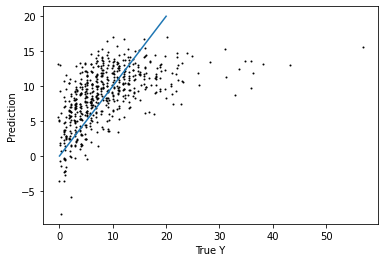

In [136]:
from numpy.random import random
from matplotlib import pyplot as plt

plt.scatter(Y_test + 0.5*(random(len(Y_test))-0.5), lr.predict(X_test), color='black', s=1)

plt.plot([0,20], [0,20])
plt.xlabel("True Y") 
plt.ylabel("Prediction")

###5 - Fichier TP3prog3.py complet et Question

Voici le contenu final du fichier TP3prog3.py :

Text(0, 0.5, 'Prediction')

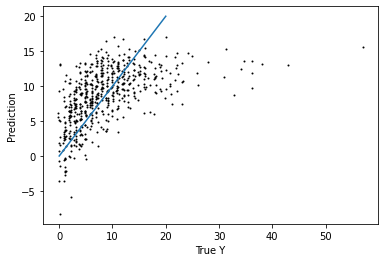

In [122]:
#Séparation
data = pd.read_csv("/content/drive/MyDrive/Université/M1/S8/IA/TP3/full_dataset.csv")
features_cols = ["my_health", "opponent_health", "my_hand", "opponent_hand", "my_board_nb_creatures",
     "my_board_total_health", "my_board_total_attack", "opponent_board_nb_creatures",
     "opponent_board_total_health", "opponent_board_total_attack"]
pred_col = "turns_to_end"
current_turn = 10
turn_df = data[data["turn_id"] == current_turn]
X = turn_df[features_cols]
Y = turn_df[pred_col]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3) 


#Régression linéaire
from sklearn import linear_model 
lr = linear_model.LinearRegression()
lr.fit(X_train, Y_train)


from sklearn.metrics import mean_squared_error


#Visualisation
from numpy.random import random
from matplotlib import pyplot as plt

plt.scatter(Y_test + 0.5*(random(len(Y_test))-0.5), lr.predict(X_test), color='black', s=1)

plt.plot([0,20], [0,20])
plt.xlabel("True Y") 
plt.ylabel("Prediction")

Ce modèle de prédiction vous paraît-il performant ? 

...

Quelles sont les raisons qui peuvent expliquer les erreurs de 
prédiction ?

...